<a href="https://colab.research.google.com/github/PMartey/Fake-New-Detection-NLP/blob/main/Fake_News_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics  import classification_report
import re
import string


### Importing the dataset

In [2]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

In [3]:
# viewing first 5 rows of fake new dataset
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# viewing the first 5 rows of the true news data set
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
# assigning class values
df_fake['Class']=0
df_true['Class']=1

In [ ]:
df_fake.head()

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
#Getting the dimensions for the datasets
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
# Removing the last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480, 23470, -1):
    df_fake.drop([i], axis = 0, inplace= True) #dropping last 10 rows

df_true_manual_testing = df_true.tail(10)
for i in range(21416, 21406, -1):
    df_true.drop([i], axis = 0, inplace = True) # dropping last 10 rows

In [8]:
#Getting the dimensions for the datasets
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [9]:
df_fake_manual_testing.head()

,title,text,subject,date,Class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [10]:
df_true_manual_testing.head()

,title,text,subject,date,Class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [11]:
# merging the 2 manual testing data set as 1
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis= 0)
df_manual_testing.head()

,title,text,subject,date,Class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [12]:
df_manual_testing.shape

(20, 5)

In [13]:
# save manual testing data frame to csv file
df_manual_testing.to_csv("manual_testing.csv")

### Merging True and Fake Dataframes

In [14]:
df_merge = pd.concat([df_fake, df_true], axis = 0 )
df_merge.head()

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
df_merge.shape

(44878, 5)

In [16]:
# listing the column names
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'Class'], dtype='object')

### Removing Columns Which are not required

In [17]:
df = df_merge.drop(['title','subject', 'date'], axis = 1)

In [18]:
#identify the sum of null values in my df dataframe
df.isnull().sum()

text     0
Class    0
dtype: int64

### Random Shuffling the dataframe


In [ ]:
df = df.sample(frac = 1)
df.head()

,text,Class
13159,ZURICH (Reuters) - Switzerland will return to ...,1
9511,NEW YORK (Reuters) - A U.S. appeals court on T...,1
2958,WASHINGTON (Reuters) - The U.S. Congress will ...,1
18605,TOKYO (Reuters) - The disapproval rating for J...,1
20743,PARIS (Reuters) - French police unearthed a se...,1


In [ ]:
df.reset_index(inplace = True)
df.head()

,index,text,Class
0,13159,ZURICH (Reuters) - Switzerland will return to ...,1
1,9511,NEW YORK (Reuters) - A U.S. appeals court on T...,1
2,2958,WASHINGTON (Reuters) - The U.S. Congress will ...,1
3,18605,TOKYO (Reuters) - The disapproval rating for J...,1
4,20743,PARIS (Reuters) - French police unearthed a se...,1


In [ ]:
df.drop(['index'], axis =1, inplace = True)
df.head()

,text,Class
0,ZURICH (Reuters) - Switzerland will return to ...,1
1,NEW YORK (Reuters) - A U.S. appeals court on T...,1
2,WASHINGTON (Reuters) - The U.S. Congress will ...,1
3,TOKYO (Reuters) - The disapproval rating for J...,1
4,PARIS (Reuters) - French police unearthed a se...,1


In [ ]:
# removing the word 'reuters' from the data, since true news has the word reuters in it
df['text'] = df['text'].replace("(Reuters)", "", regex =True )

df.head()

,text,Class
0,ZURICH () - Switzerland will return to Nigeria...,1
1,NEW YORK () - A U.S. appeals court on Tuesday ...,1
2,WASHINGTON () - The U.S. Congress will need to...,1
3,TOKYO () - The disapproval rating for Japanese...,1
4,PARIS () - French police unearthed a second st...,1


### Creating a function to process the texts


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    # This is where i remove the "()" from the text column. You can do in whatever way you want
    # The key is to remove the "(Reuters)" string as it is present in all text of True.csv.
    # The Model during the training part can memorize it and perfrom great in training and badly when other testing input is given.
    text = re.sub('[()]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['text'] = df['text'].apply(wordopt)

In [ ]:
df.head()

,text,Class
0,zurich switzerland will return to nigeria a...,1
1,new york a u s appeals court on tuesday po...,1
2,washington the u s congress will need to r...,1
3,tokyo the disapproval rating for japanese p...,1
4,paris french police unearthed a second stas...,1


### Defining dependent and independent variables


In [ ]:
x = df['text']
y= df['Class']

### Splitting Training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### Convert text to vectors

Feature Extraction: Convert the text data into numerical features.   
Term Frequency-Inverse Document Frequency (TF-IDF): Adjusting word counts by the importance of words across documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()

In [ ]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
xv_train.shape

(33658, 95766)

In [ ]:
xv_test.shape

(11220, 95766)

## Model 1
### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
# Fit the LR model on the data set
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
# make our y predictions
pred_lr = LR.predict(xv_test)

In [ ]:
# check the accuracy score of the LR model
LR.score(xv_test, y_test)

0.9805704099821747

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5859
           1       0.98      0.98      0.98      5361

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



### Model 2

### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
#fit the decision tree model on the train dataset
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
# using the accuracy as our KPI
DT.score(xv_test, y_test)

0.9447415329768271

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5859
           1       0.95      0.93      0.94      5361

    accuracy                           0.94     11220
   macro avg       0.95      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



### Model 3

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(xv_train, y_train)

GradientBoostingClassifier()

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9672014260249554

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5859
           1       0.96      0.97      0.97      5361

    accuracy                           0.97     11220
   macro avg       0.97      0.97      0.97     11220
weighted avg       0.97      0.97      0.97     11220



### Model 4


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(xv_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test,y_test)

0.9781639928698752

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5859
           1       0.98      0.98      0.98      5361

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



### Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

The Maldives has announced it will ban Israeli passport holders from entering the country amid its war on Hamas in Gaza.  The presidential office of the Indian Ocean island nation, known for its luxurious resorts and endless white sand beaches, made the announcement in a press release Sunday.  Maldivian President Dr Mohamed Muizzu resolved to impose the ban following a recommendation from the cabinet, the release said.  The country’s laws will be amended, and a cabinet subcommittee will be established to oversee the efforts, the president’s office said.  Following news of the ban, the Israeli Ministry of Foreign Affairs recommended Israelis avoid travel to the island and “for Israeli citizens staying in the country, it is recommended to consider leaving, since if they fall into distress for any reason, it will be difficult for us to help.”


LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


### Word cloud

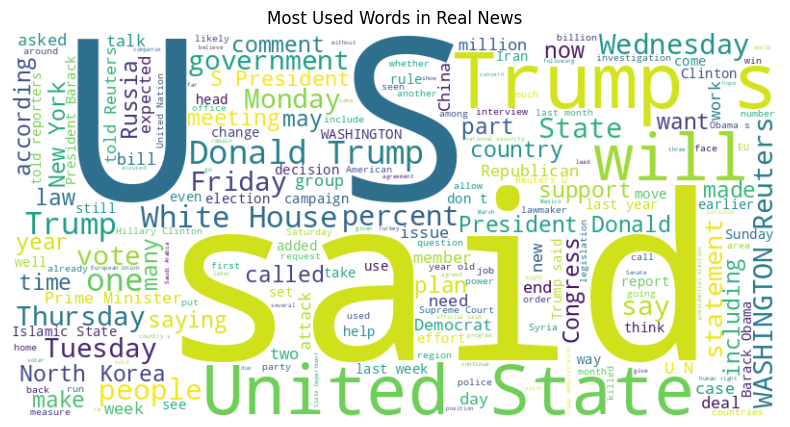

In [20]:
from wordcloud import WordCloud, STOPWORDS

#join all the real news
real_news = ' '.join(list(df[df['Class'] == 1]['text']))

# create word cloud for real news
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(real_news)

# plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Real News')
plt.show()